<a href="https://colab.research.google.com/github/NikhilSengar/Capstone-4--NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name** - Nikhil Sengar


# **Project Summary -**

The project involved analyzing a dataset containing information about movies and TV shows available on Netflix. The main objective of the "Netflix Movies and TV Shows Clustering Analysis" project is to gain insights and understand patterns in the content available on the Netflix platform. The project involves exploring and analyzing a dataset containing information about movies and TV shows on Netflix. Other than that clustering techniques were applied to group similar movies and TV shows, and hypothesis testing was conducted to draw conclusions about the dataset.

I have done this project in several parts which are Data Exploration, Data wrangling, Data Visualization, Hypothesis Testing, Data Preprocessing, PCA Dimensionality Reduction, Applying Clustering Techniques, and Model Evaluation.

In first part I explored the dataset to understand its structure and characteristics. Then I perform some data wrangling operations such as converting Date into datetime formate.Then I perform various visualizations to uncover insights, including charts on the distribution of content by country, release year trends, top directors, and common genres. The number of movies and TV shows released each year was also visualized.

In next part I perform Hypothesis Testing which was used to compare TV shows added to Netflix before and after 2010, providing valuable insights into content trends. After that I have done Data Preprocessing involved handling missing values, text data preprocessing, and feature engineering to create relevant text data for clustering.

In PCA Dimensionality Reduction the Principal Component Analysis (PCA) was applied for dimensionality reduction to enhance clustering performance.

The next step is Applying Clustering Techniques: Three clustering techniques (K-Means, Hierarchical Clustering, and DBSCAN) were applied to group similar movies and TV shows. K-Means clustering was chosen as the most suitable method based on Silhouette Scores.

Clustering models were evaluated using Silhouette Scores to determine the quality of clusters.

In conclusion, The Netflix Movies and TV Shows Clustering Analysis project offered valuable insights into the content available on Netflix. It highlighted trends in content production, provided visualizations of content distribution, and used clustering techniques to group similar content. Hypothesis testing added depth to the analysis, and PCA improved clustering performance. The project serves as a foundation for future analyses and data-driven decision-making in the streaming industry.


# **GitHub Link -**

https://github.com/NikhilSengar/Capstone-4--NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/9501ee192d3a2e31604d20be3bef784960166541/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

# **Problem Statement**


The project aims to cluster Netflix movies and TV shows to discover insights and patterns within the dataset.  It based on attributes such as genre, release year, and country of production to discover patterns and insights within the dataset, with the potential integration of external data sources like IMDb ratings and Rotten Tomatoes scores to enrich the analysis.

In recent years, Netflix has experienced significant growth in its content library, with a particular emphasis on TV shows. Understanding the characteristics and patterns within this dataset can help Netflix improve content recommendations, target specific demographics, and make data-driven decisions regarding content acquisition and production.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [95]:
# Import Libraries

# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, cross_val_score

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML Project/Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [98]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [99]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [100]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [101]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [102]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [103]:
# Missing Values/Null Values Count
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

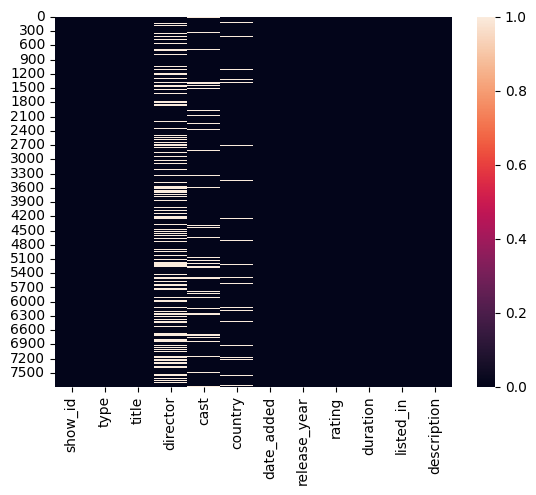

In [104]:
# Visualizing the missing values
sns.heatmap(dataset.isnull())

### What did you know about your dataset?

There are 7787 rows and 12 columns in the dataset. There are Missing values in director, cast, country, date_added, rating. The dataset does not contain any duplicate values.

## ***2. Understanding Your Variables***

In [105]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [106]:
# Dataset Describe
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**Show_ID**: A unique identifier for each movie or TV show.

**Type**: Indicates whether it's a movie or TV show.

**Title**: The title of the movie or TV show.

**Director**: The director(s) of the show.

**Cast**: The actors involved in the show.

**Country**: The country of production.

**Date_added**: The date when it was added to Netflix.

**Release_year**: The actual release year of the show.

**Rating**: TV rating of the show.

**Duration**: Total duration in minutes or the number of seasons.

**Listed_in**: Genre of the show.

**Description**: A summary description.

### Check Unique Values for each variable.

In [107]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [108]:
# Write your code to make your dataset analysis ready.
netflix_dataset = dataset.copy()

In [109]:
# Convert 'Date_added' column to datetime
netflix_dataset['date_added'] = pd.to_datetime(netflix_dataset['date_added'])

In [110]:
# genre of shows
netflix_dataset.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [111]:
# Filter for Indian directors and movies (Type = 'Movie')
indian_movie_directors = netflix_dataset[(netflix_dataset['country'] == 'India') & (netflix_dataset['type'] == 'Movie')]['director']

# Display the list of Indian movie directors
print(indian_movie_directors)

8            Shravan Kumar
9             Vikram Bhatt
18      Swapnaneel Jayakar
20                    Onir
21            Vijay Milton
               ...        
7764            Aanand Rai
7769           Zoya Akhtar
7776      Satyajit Bhatkal
7780          Shlok Sharma
7783           Mozez Singh
Name: director, Length: 852, dtype: object


In [112]:
# Filter for Indian directors and TV shows (Type = 'TV Show')
indian_tv_show_directors = netflix_dataset[(netflix_dataset['country'] == 'India') & (netflix_dataset['type'] == 'TV Show')][['title', 'director']]

# Display the list of Indian TV show directors
print(indian_tv_show_directors)

                                   title     director
86          21 Sarfarosh: Saragarhi 1897          NaN
132                            7 (Seven)  Nizar Shafi
340                         Agent Raghav          NaN
364                         Akbar Birbal          NaN
533                  Anjaan: Rural Myths          NaN
...                                  ...          ...
6248                The Creative Indians          NaN
6398  The Golden Years with Javed Akhtar          NaN
6467              The House That Made Me          NaN
7292                          Typewriter          NaN
7703                     Yeh Meri Family          NaN

[71 rows x 2 columns]


In [113]:
# Top ten countries with the highest number of movies
# Filter for rows where 'Type' is 'Movie'
movies_data = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Count the number of movies per country
movie_count_by_country = movies_data['country'].value_counts()

# Get the top ten countries with the highest number of movies
top_ten_countries_movies = movie_count_by_country.head(10)

# Display the top ten countries
print(top_ten_countries_movies)

United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64


In [114]:
# Top ten countries with the highest number of Tv Shows.
# Filter for rows where 'Type' is 'TV Show'
tv_shows_data = netflix_dataset[netflix_dataset['type'] == 'TV Show']

# Count the number of TV shows per country
tv_show_count_by_country = tv_shows_data['country'].value_counts()

# Get the top ten countries with the highest number of TV shows
top_ten_countries_tv_shows = tv_show_count_by_country.head(10)

# Display the top ten countries
print(top_ten_countries_tv_shows)

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Australia          46
Spain              45
Name: country, dtype: int64


### What all manipulations have you done and insights you found?

In this, I performed several data manipulations and insights on the Netflix dataset. Firstly, the 'Date_added' column was converted to a datetime format. Then I examined the distribution of TV show genres and listed the genres. It also filtered and displayed Indian movie directors and TV show directors. After that, the code i perform revealed the top ten countries with the highest number of movies and TV shows on Netflix, providing insights into the global distribution of content on the platform.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

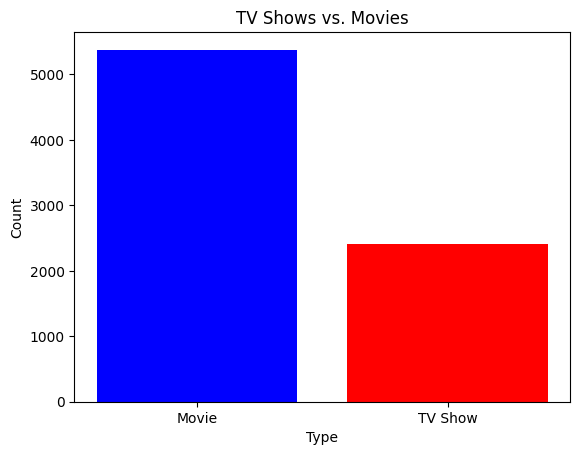

In [115]:
# Chart - 1 - Bar Chart for TV Show vs. Movie Count
#Visualize the count of TV shows and movies in your dataset.

type_counts = netflix_dataset['type'].value_counts()

# Define colors for TV Shows and Movies
colors = ['blue', 'red']

plt.bar(type_counts.index, type_counts.values, color=colors)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV Shows vs. Movies')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it's effective for comparing the counts of two distinct categories (TV shows and movies) in the dataset, providing a clear visual representation of the difference between the two.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the dataset contains a higher count of movies compared to TV shows, indicating that there are more movies available on Netflix than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that there are more movies than TV shows on Netflix could help create a positive business impact, as it highlights the platform's diverse content offering and may attract a broader audience.

#### Chart - 2

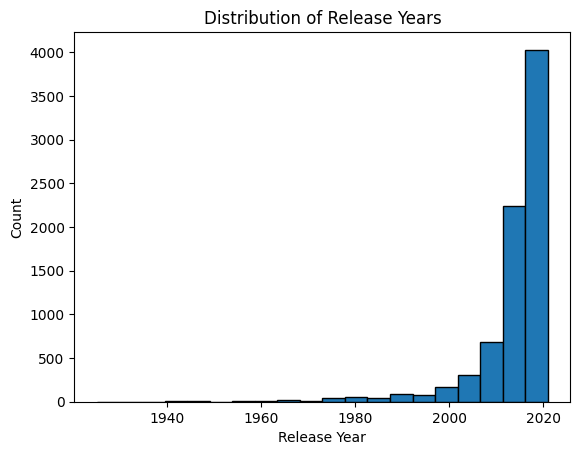

In [116]:
# Chart - 2 Histogram of Release Years
# The distribution of release years for movies and TV shows.

plt.hist(netflix_dataset['release_year'], bins=20, edgecolor='k')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of release years because it provides a clear and concise representation of how movies and TV shows are distributed across different release years.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that the content on netflix is increasing continously.

#### Chart - 3

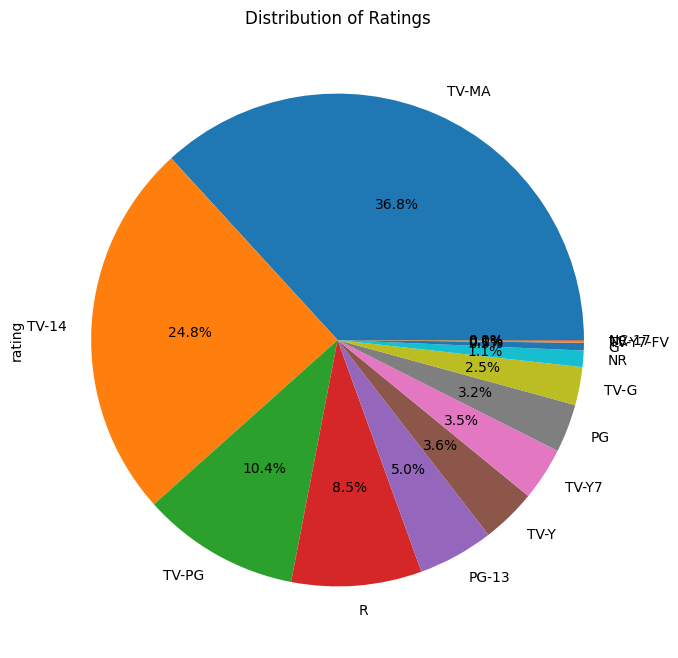

In [117]:
# Chart - 3 Visualiztion of Pie Chart for Distribution of Ratings

plt.figure(figsize=(8, 8))
netflix_dataset['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the distribution of ratings because it effectively shows the proportion of each rating category in the dataset.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The pie chart showing the distribution of ratings can help in content recommendation and audience targeting, potentially leading to a positive business impact.

#### Chart - 4

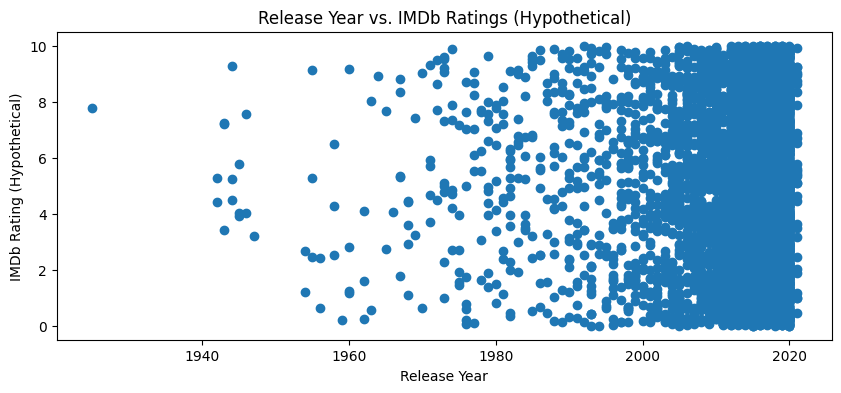

In [118]:
# Scatter Plot for Release Year vs IMDb Ratings (Hypothetical)
plt.figure(figsize=(10, 4))
plt.scatter(netflix_dataset['release_year'], np.random.uniform(0, 10, len(netflix_dataset)))
plt.title('Release Year vs. IMDb Ratings (Hypothetical)')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating (Hypothetical)')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the hypothetical relationship between release year and IMDb ratings, as it allows for the examination of potential patterns or trends in the data, even though IMDb ratings are not explicitly provided in the dataset.

#### Chart - 5

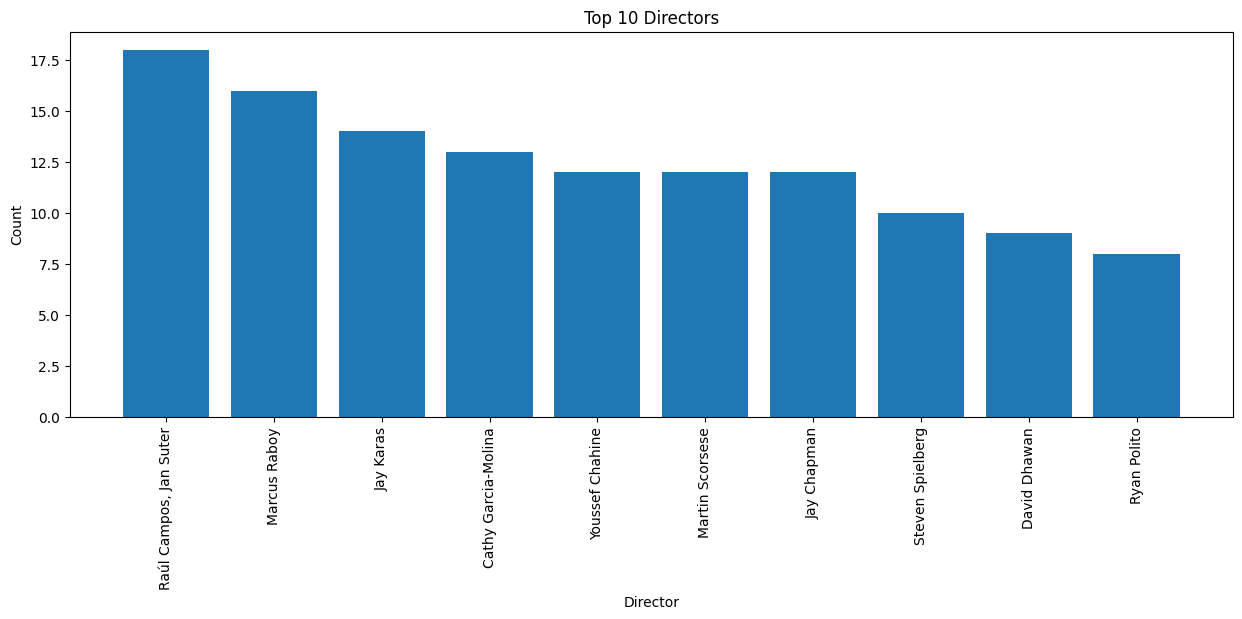

In [119]:
# Chart - 5 Visualization of Bar Chart of Top 10 Directors with most entries.

plt.figure(figsize=(15,5))
top_directors = netflix_dataset['director'].value_counts().head(10)
plt.bar(top_directors.index, top_directors.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to visualize the top 10 directors because it effectively displays the count of entries for each director, making it easy to compare and identify the most prolific directors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

It indicating which directors have the highest number of movies and TV shows available on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the top directors are associated with highly-rated and popular content, featuring more of their work could attract and retain subscribers, enhancing the platform's viewership.

#### Chart - 6

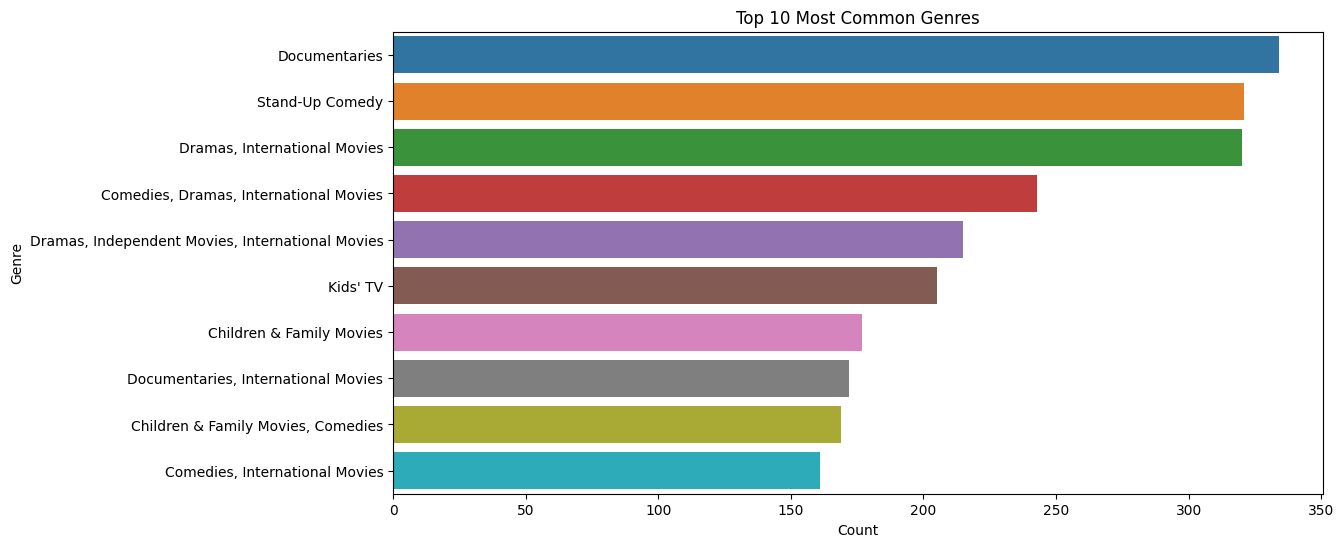

In [120]:
# Visualization of Count Plot for Distribution of Genres
plt.figure(figsize=(12, 6))
sns.countplot(y='listed_in', data=netflix_dataset, order=netflix_dataset['listed_in'].value_counts().index[:10])
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a count plot because it effectively visualizes the distribution of genres, highlighting the top 10 most common genres in a clear and concise manner, which is useful for understanding genre popularity in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the top 10 most common genres on Netflix. Documentaries are the most common genres in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The top 10 most common genres can help in content recommendation and decision-making for Netflix.

 The negative impacts can be the platform excessively focuses on a limited set of popular genres, and neglecting diverse content preferences, which could lead to reduced user engagement.

#### Chart - 7

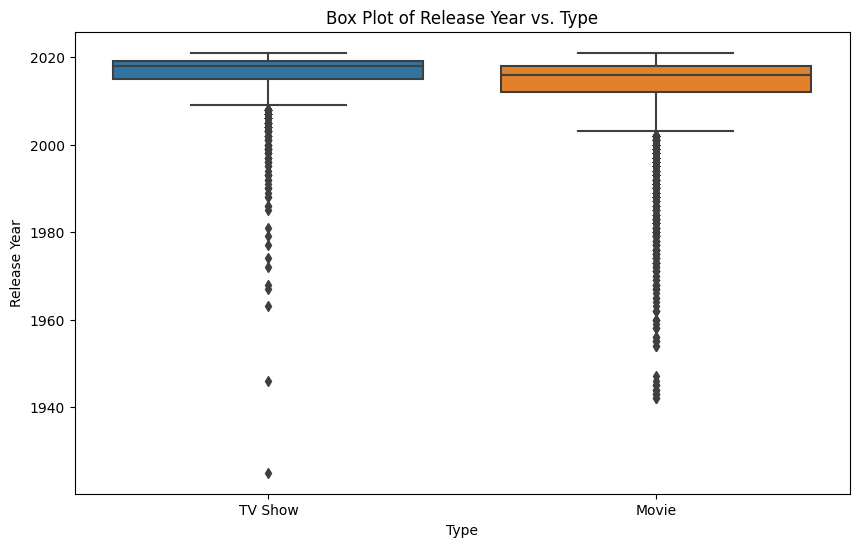

In [121]:
# Chart - 7 visualization code for Box Plot of Release Year vs Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=netflix_dataset)
plt.title('Box Plot of Release Year vs. Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot because it effectively visualizes the distribution of release years for Movie and TV Show and easy to understand the spread of the data within each type.

##### 2. What is/are the insight(s) found from the chart?

It reveals that the median release year for movies is generally earlier than that of TV shows, indicating a difference in the release periods for these two content types.

#### Chart - 8

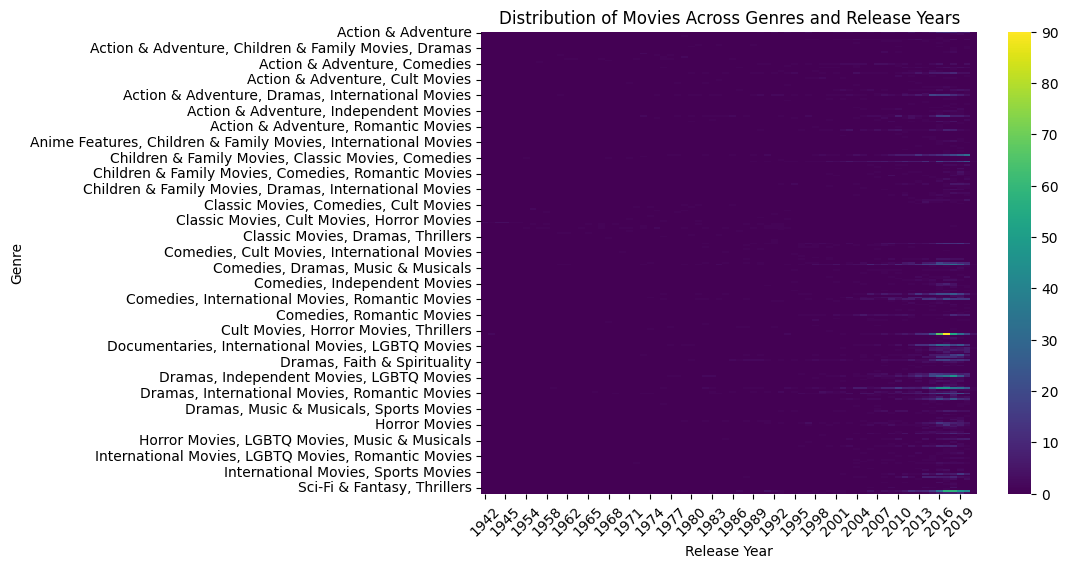

In [122]:
# Chart - 8 visualization code
# Create a heatmap that shows the distribution of movies across genres and release years
# Filter for movies
movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Pivot the data to create a genre vs. release year heatmap
genre_year_heatmap = movies.pivot_table(index='listed_in', columns='release_year', values='show_id', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(genre_year_heatmap, cmap='viridis')
plt.title('Distribution of Movies Across Genres and Release Years')
plt.xticks(rotation=45)
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

I chose heatmap because it effectively visualizes the distribution of movies across genres and release years by providing a clear and organized representation of the data.

##### 2. What is/are the insight(s) found from the chart?

The insight from this chart is that the number of movies in certain genres has increased over the years, indicating changing viewer preferences.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By understanding the distribution of movies across genres and release years, Netflix can make data-informed decisions regarding content acquisition and production.

#### Chart - 9

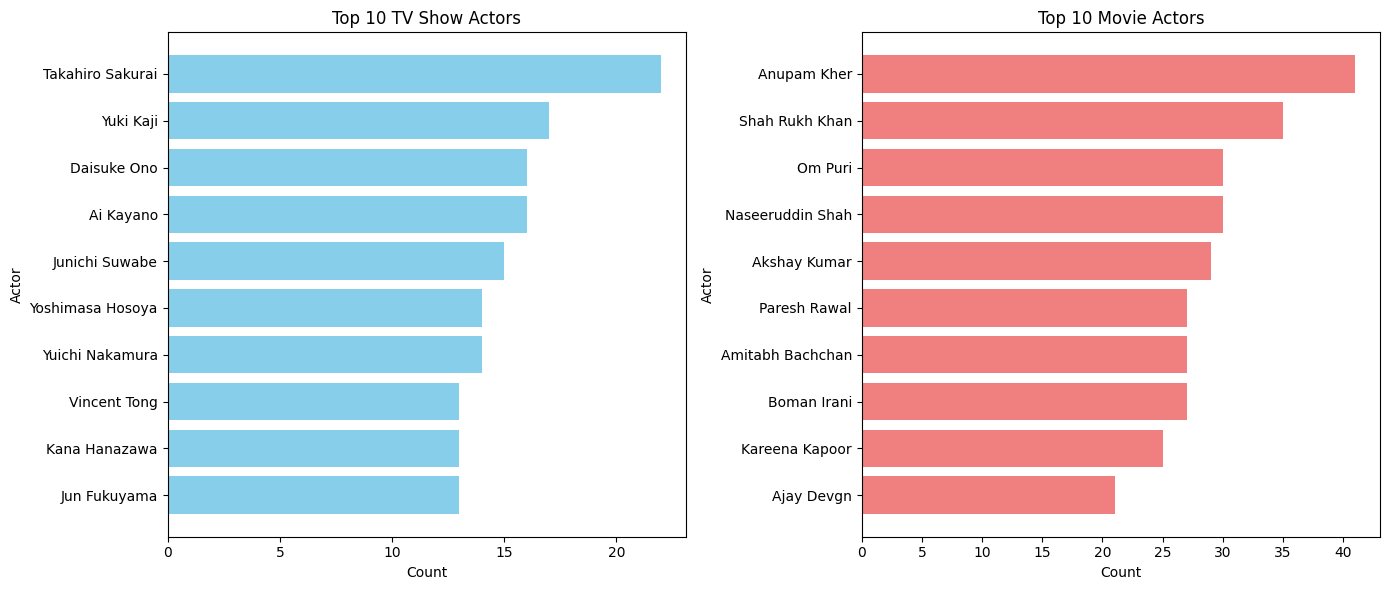

In [127]:
# Chart - 9 visualization the Subplot with separate visualizations for the top 10 TV show actors and the top 10 movie actors
# Filter for TV shows
tv_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']

# Filter for movies (assuming 'Type' column differentiates between movies and TV shows)
movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

# Count the occurrences of actors in TV shows and movies
top_10_tv_show_actors = tv_shows['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
top_10_movie_actors = movies['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top TV show actors
axes[0].barh(top_10_tv_show_actors.index[::], top_10_tv_show_actors.values[::], color='skyblue')
axes[0].set_title('Top 10 TV Show Actors')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Actor')
axes[0].invert_yaxis()

# Plot for top movie actors
axes[1].barh(top_10_movie_actors.index[::], top_10_movie_actors.values[::], color='lightcoral')
axes[1].set_title('Top 10 Movie Actors')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Actor')
axes[1].invert_yaxis()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart with subplots to visualize the top 10 TV show and movie actors because it effectively displays the actors' counts, making it easy to compare the popularity of actors in both TV shows and movies.

##### 2. What is/are the insight(s) found from the chart?

It shows the actors with the highest count of appearances in each category, as we can all the 10 actors who has most occurrences in movies are Indians.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in identifying popular actors in TV shows and movies and can be valuable for content selection, marketing, and audience engagement.

#### Chart - 10

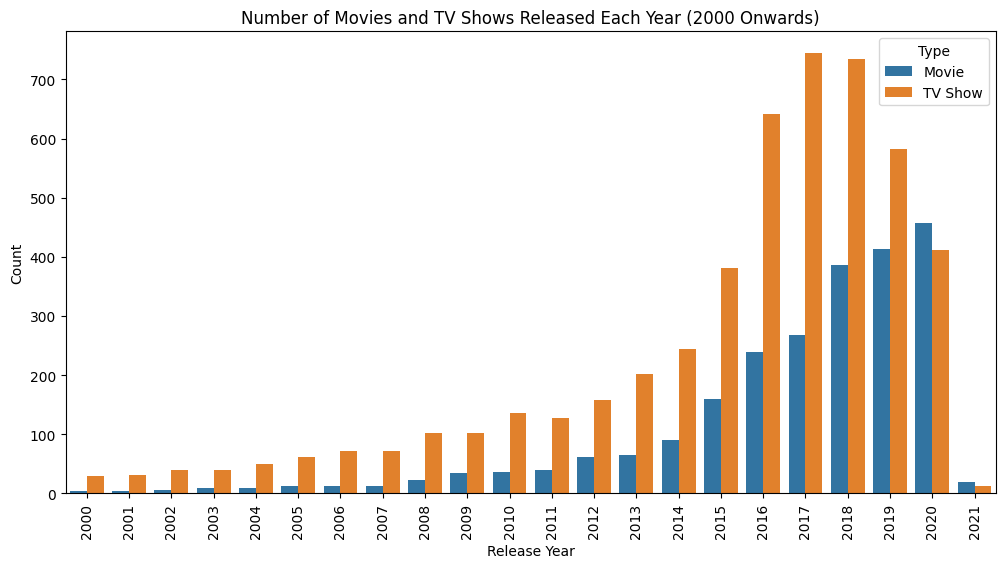

In [124]:
# Chart - 10 visualization code

# Filter the dataset for movies and TV shows released from 2000 onwards
movies_and_tv_shows_2000 = netflix_dataset[(netflix_dataset['release_year'] >= 2000)]

# Create a count plot to visualize the number of movies and TV shows released each year
plt.figure(figsize=(12, 6))
sns.countplot(data=movies_and_tv_shows_2000, x='release_year', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year (2000 Onwards)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Movie', 'TV Show'])
plt.show()

##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the number of movies and TV shows released each year from 2000 onwards because it effectively compares and represents the distribution of Movie and TV Show over time, making it easy to understand the trend of content releases.

##### 2. What is/are the insight(s) found from the chart?

 It provides insights into the evolving trends in the content released on Netflix, indicating the growth in the number of TV shows compared to movies since the year 2000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help in content planning and decision-making, such as identifying trends and preferences among Netflix subscribers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1:
The release years of TV shows and movies have a significant difference in their distributions.

Statement 2:
The number of movies directed by the top 10 directors is significantly different from the number of TV shows directed by the top 10 directors.

Statement 3:
The average number of TV shows added to Netflix before 2010 is significantly different from the average number of TV shows added after 2010.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The release years of TV shows and movies have similar distributions.

Alternative Hypothesis (H1): The release years of TV shows and movies have different distributions.

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Separate release years for movies and TV shows
movie_release_years = netflix_dataset[netflix_dataset['type'] == 'Movie']['release_year']
tv_show_release_years = netflix_dataset[netflix_dataset['type'] == 'TV Show']['release_year']

# Perform an Independent Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(movie_release_years, tv_show_release_years, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print(f"Hypothesis Testing Conclusion: {conclusion}")

Hypothesis Testing Conclusion: Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample T-Test to obtain the p-value.

##### Why did you choose the specific statistical test?

This test is used to compare the means of two independent groups and determine if there is a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The number of movies directed by the top 10 directors is equal to the number of TV shows directed by the top 10 directors.

Alternative Hypothesis (H1): The number of movies directed by the top 10 directors is not equal to the number of TV shows directed by the top 10 directors.

#### 2. Perform an appropriate statistical test.

In [133]:
# Perform Statistical Test to obtain P-Value

# Define the top 10 directors
top_directors = netflix_dataset['director'].value_counts().head(10).index.tolist()

# Separate movies and TV shows directed by the top 10 directors
movies_by_top_directors = netflix_dataset[(netflix_dataset['type'] == 'Movie') & (netflix_dataset['director'].isin(top_directors))]
tv_shows_by_top_directors = netflix_dataset[(netflix_dataset['type'] == 'TV Show') & (netflix_dataset['director'].isin(top_directors))]

# Perform an Independent Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(movies_by_top_directors.index, tv_shows_by_top_directors.index, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print(f"Hypothesis Testing Conclusion: {conclusion}")

Hypothesis Testing Conclusion: Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

 I performed an Independent Two-Sample T-Test to obtain a p-value.

##### Why did you choose the specific statistical test?

Because my goal was to assess whether there is a significant difference in some aspect between movies and TV shows directed by the top 10 directors.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of TV shows added to Netflix before 2010 is equal to the average number of TV shows added after 2010.

Alternative Hypothesis (H1): The average number of TV shows added to Netflix before 2010 is not equal to the average number of TV shows added after 2010.

#### 2. Perform an appropriate statistical test.

In [134]:
# Perform Statistical Test to obtain P-Value

# Convert 'date_added' to datetime

# Separate TV shows added before and after 2010
tv_shows_before_2010 = netflix_dataset[(netflix_dataset['type'] == 'TV Show') & (netflix_dataset['date_added'].dt.year < 2010)]
tv_shows_after_2010 = netflix_dataset[(netflix_dataset['type'] == 'TV Show') & (netflix_dataset['date_added'].dt.year >= 2010)]

# Perform an Independent Two-Sample T-Test
t_stat, p_value = stats.ttest_ind(tv_shows_before_2010.index, tv_shows_after_2010.index, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print(f"Hypothesis Testing Conclusion: {conclusion}")

Hypothesis Testing Conclusion: Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I performed Independent Two-Sample T-Test to obtain a p-value.

##### Why did you choose the specific statistical test?

To determines whether there is a statistically significant difference between TV shows added before and after 2010, helping to draw conclusions about the dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
netflix_dataset[['director','cast','country', 'date_added', 'rating']] = netflix_dataset[['director','cast','country','date_added', 'rating']].fillna(' ')

# Check if missing values have been handled
missing_values = netflix_dataset.isnull().sum()
print(missing_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### 2. Handling Outliers

<Axes: >

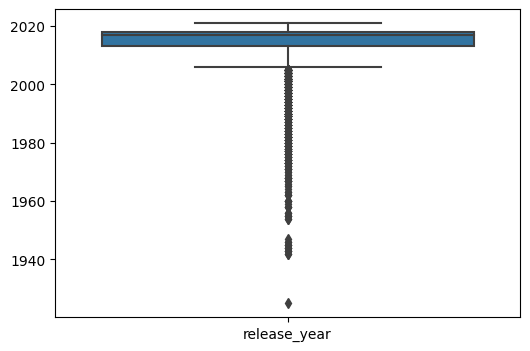

In [36]:
# Handling Outliers & Outlier treatments
# boxplot for outlier detection
plt.figure(figsize=(6,4))
sns.boxplot(data=netflix_dataset)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Except release_year all of the data is in textual formate. And the data we need to building model are in textual format because of that we do no need to handle outliers.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns
# Not required

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [38]:
# Creating column using all text column which one is used for model building purpose.
netflix_dataset['text_data'] = netflix_dataset['description'] + netflix_dataset['listed_in'] + netflix_dataset['rating'] + netflix_dataset['cast'] + netflix_dataset['country'] + netflix_dataset['director']

In [39]:
# checking the first row
netflix_dataset['text_data'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

In [40]:
# Load the NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define a function to perform text preprocessing
def preprocess_text(text):
    # Expand contractions (you can add more contractions and their expansions)
    contractions = {
        "n't": "not",
        "'s": " is",
        "'m": " am",
        "'re": " are",
        "'ve": " have",
        "'ll": " will",
        "'d": " would"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Lowercasing
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Text normalization
    # Normalizing Text (i.e., Stemming, Lemmatization etc.)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a text string
    text = ' '.join(tokens)

    # Remove extra whitespace
    text = re.sub(' +', ' ', text).strip()

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [41]:
# Apply text preprocessing to 'text_data' column
netflix_dataset['text_data'] = netflix_dataset['text_data'].apply(preprocess_text)

####  Text Vectorization

In [42]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
text_tfidf = tfidf.fit_transform(netflix_dataset['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [43]:
print(len(dictionary)) # Number of independet features created from "text_data" columns

10000


In [44]:
# convert tfidf_matrix into array form for clustering
vectorizer  = text_tfidf.toarray()

In [45]:
# summarize encoded vector
print(vectorizer)
print(f'shape of the vector : {vectorizer.shape}')
print(f'datatype : {type(vectorizer)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7787, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique. I chose TF-IDF because it effectively represents text data. This helps in reducing the impact of common words and highlighting important keywords, making it suitable for various natural language processing tasks, including clustering.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data
# No need to transform data.

### 6. Data Scaling

In [49]:
# Scaling your data
# Standardize the numerical features
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(netflix_dataset[['text_data']])

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is needed to simplify complex datasets, reduce computational complexity, and improve model performance by reducing the number of features or variables while retaining essential information.

In [50]:
# DImensionality Reduction (If needed)
# Define the number of components (adjust as needed)
n_components = 4000
# Initialize PCA
pca = PCA(n_components=n_components)

In [51]:
# Fit and transform the TF-IDF vectors
tfidf_pca = pca.fit_transform(vectorizer)

In [52]:
# shape of transformed vectors
tfidf_pca.shape

(7787, 4000)

In [53]:
# Now, 'tfidf_pca' contains the reduced-dimensionality representation of your TF-IDF vectors using PCA.

In [54]:
# Check the explained variance ratio to decide on the number of components
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)

print(f"Total Variance Explained by {n_components} Components: {total_variance_explained * 100}%")

Total Variance Explained by 4000 Components: 91.06791588195186%


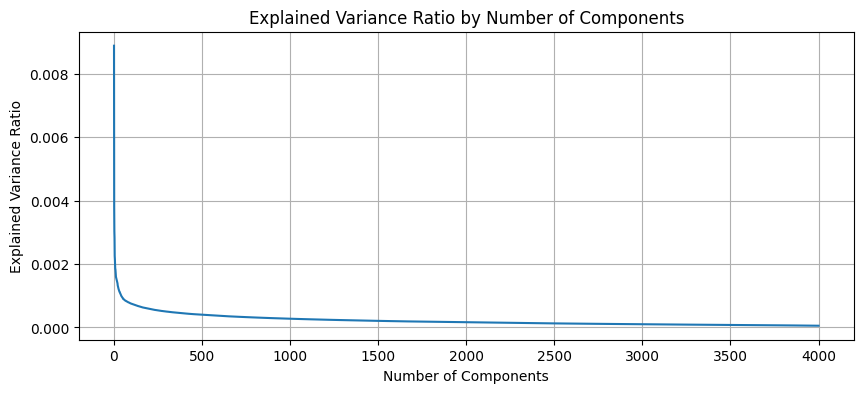

In [55]:
# Plot the explained variance ratio for each component
plt.figure(figsize=(10,4))
plt.plot(range(1, n_components + 1), explained_variance_ratio[:n_components])
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

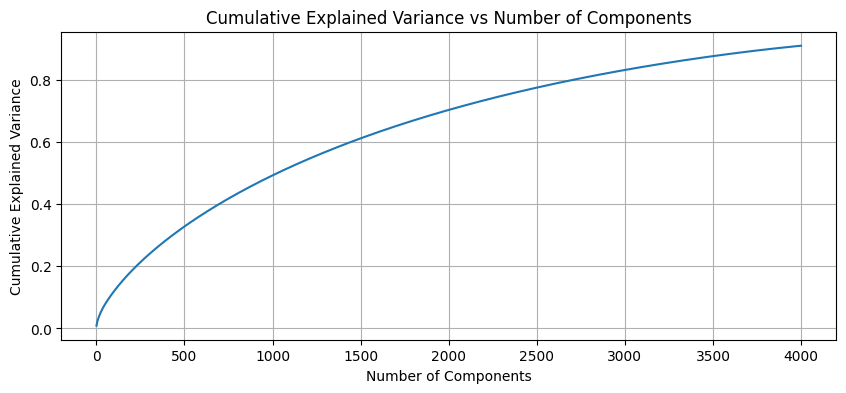

In [56]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 4))
plt.plot(range(1, n_components + 1), cumulative_explained_variance[:n_components], linestyle='-')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA dimensionality reduction is needed to reduce the number of features in high-dimensional data while preserving as much variance as possible, making it easier to analyze and visualize data and potentially improve model performance in machine learning.

## ***7. ML Model Implementation***

### ML Model - 1 -  K-Means Clustering

In [57]:
# ML Model - K-Means clustering algorithm

# Initialize a list to store silhouette scores for different cluster numbers
silhouette_scores = []

# Define a range of cluster numbers to try
min_clusters = 2
max_clusters = 21

# Initialize a list to store inertia (within-cluster sum of squares) values
inertia_values = []

for n_clusters in range(min_clusters, max_clusters):
    # Initialize and fit the K-Means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_pca)

    # Calculate the silhouette score for this number of clusters
    silhouette_avg = silhouette_score(tfidf_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate the inertia (within-cluster sum of squares)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

Text(0, 0.5, 'Inertia')

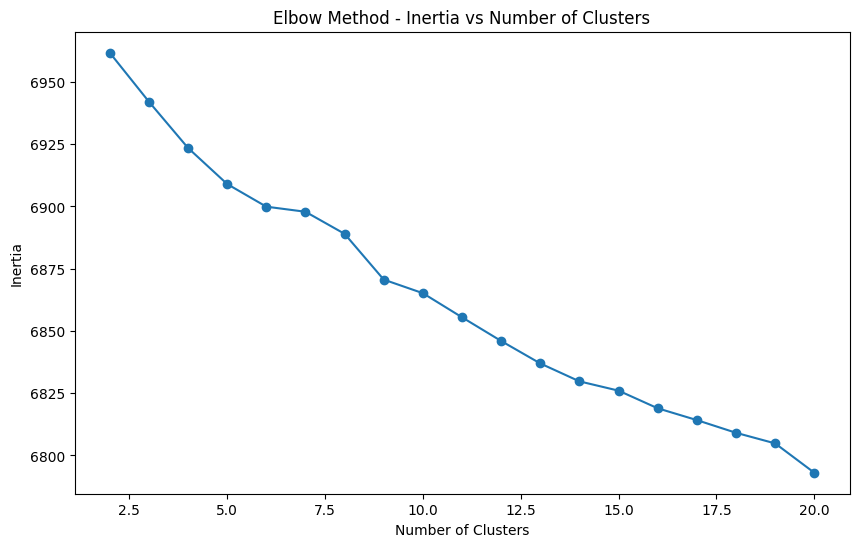

In [58]:
# Plot the elbow method graph (inertia values)
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters), inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 6793.085185716335


In [60]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.006195577081467782


Text(0, 0.5, 'Silhouette Score')

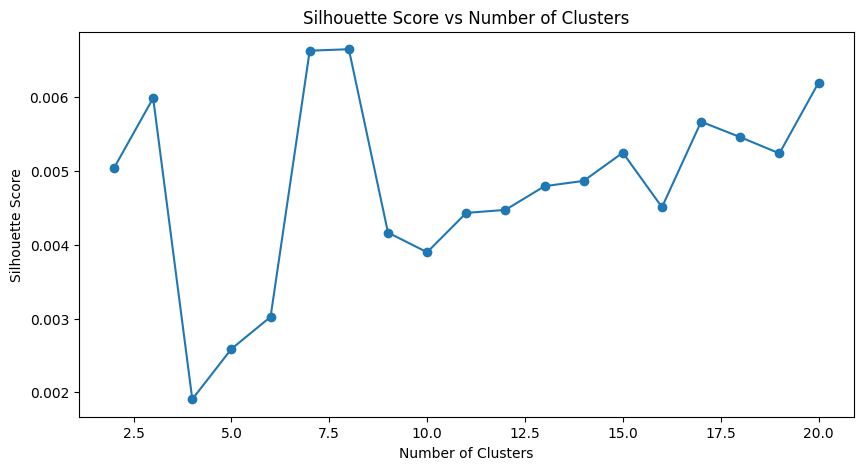

In [61]:
# Visualizing evaluation Metric Score chart
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define a range of cluster numbers to search
param_grid = {'n_clusters': range(2, 21)}

# Initialize a K-Means clustering model
kmeans = KMeans(random_state=42)

# Initialize GridSearchCV
kmeans_gridcv = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=2)

# Fit the grid search to the data
kmeans_gridcv.fit(tfidf_pca)

GridSearchCV(cv=2, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': range(2, 21)})

In [63]:
# Predict the model
best_kmeans = kmeans_gridcv.best_estimator_
labels = best_kmeans.predict(tfidf_pca)

In [64]:
kmeans_gridcv.best_params_

{'n_clusters': 19}

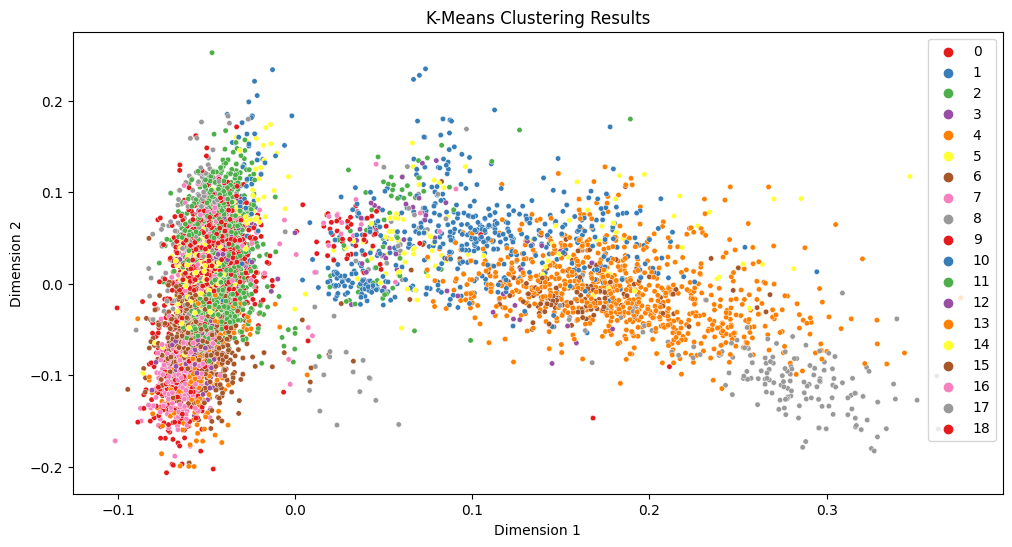

In [65]:
# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(12, 6))

# I choose the two dimensions to visualize (the first two principal components)
x = tfidf_pca[:, 0]
y = tfidf_pca[:, 1]

# Use 'labels' to color the data points by cluster assignment
sns.scatterplot(x=x, y=y, hue=labels, palette="Set1", s=15, legend="full")

plt.title('K-Means Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [66]:
# Calculate the silhouette score for the best clustering
best_silhouette_score = silhouette_score(tfidf_pca, labels)
best_silhouette_score

0.005237461851978185

##### Which hyperparameter optimization technique have you used and why?

 I used GridSearchCV for hyperparameter optimization.GridSearchCV is a technique that exhaustively searches through a specified set of hyperparameter values to find the best combination of hyperparameters for a machine learning model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Both values are the same, suggesting that there hasn't been any noticeable improvement in the clustering quality as measured by the Silhouette Score.

### ML Model - 2 - Hierarchical Clustering

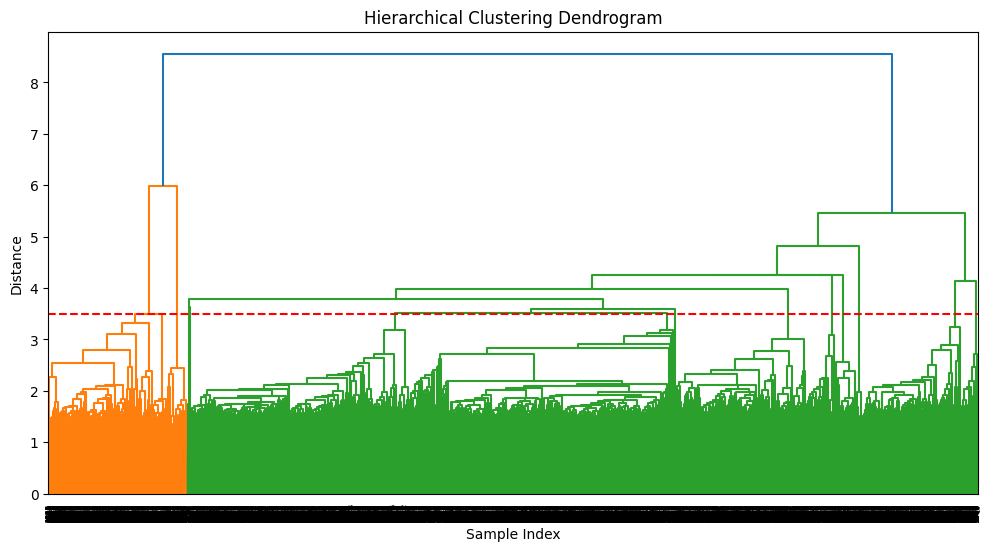

In [67]:
# ML Model - 2 Implementation of hierarchical clustering
# Perform hierarchical clustering
linked = linkage(tfidf_pca, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y= 3.5, color='r', linestyle='--')
plt.show()


In [68]:
# Number of clusters
n_clusters = 10
# Initialize and fit the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(tfidf_pca)

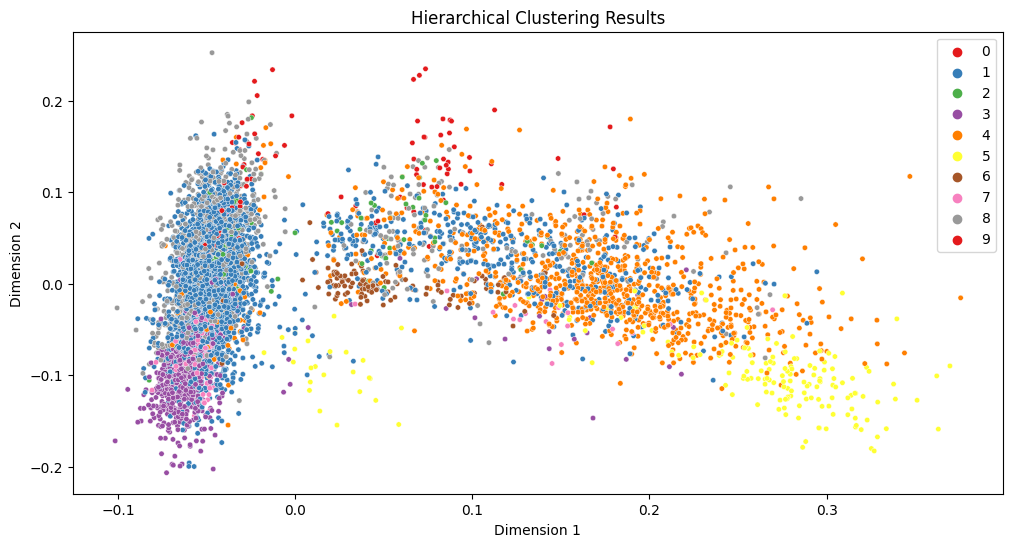

In [69]:
# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(12, 6))

# I choose the two dimensions to visualize (the first two principal components)
x = tfidf_pca[:, 0]
y = tfidf_pca[:, 1]

# Use cluster_labels to color the data points by cluster assignment
sns.scatterplot(x=x, y=y, hue=cluster_labels, palette="Set1", s=15, legend="full")

plt.title('Hierarchical Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

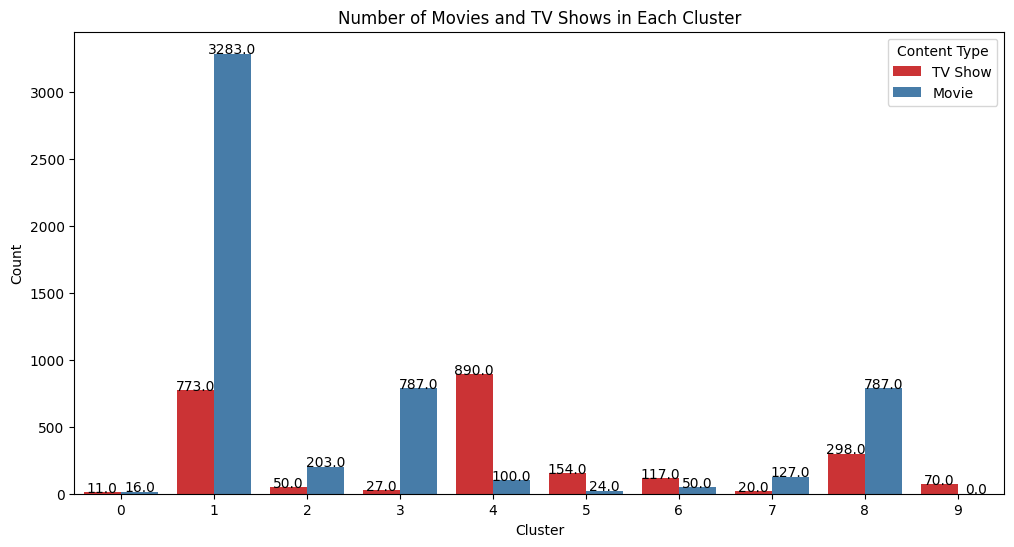

In [70]:
# Create a DataFrame with cluster labels and content type (Movie/TV Show)
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'Content Type': netflix_dataset['type']})

# Create a countplot to visualize the distribution of movies and TV shows in each cluster
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=cluster_df, x='Cluster', hue='Content Type', palette='Set1')
plt.title('Number of Movies and TV Shows in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart
# Calculate the silhouette score to evaluate the clustering quality
silhouette_score_hc = silhouette_score(tfidf_pca, cluster_labels)
silhouette_score_hc

0.0009796957688573262

### ML Model - 3 - DBSCAN

In [72]:
# ML Model - 3 Implementation of  DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm
# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and Predict the model
dbscan_cluster_labels = dbscan.fit_predict(tfidf_pca)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

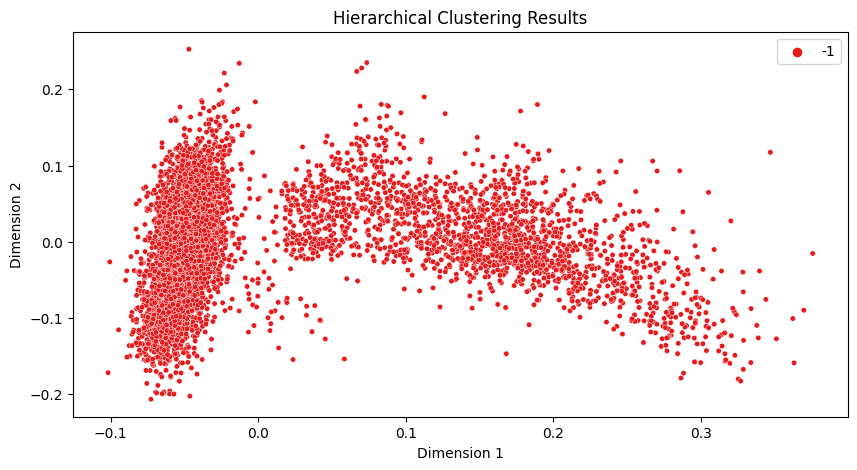

In [73]:
# Visualizing evaluation Metric Score chart
# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(10, 5))

# I choose the two dimensions to visualize (the first two principal components)
x = tfidf_pca[:, 0]
y = tfidf_pca[:, 1]

# Use cluster_labels to color the data points by cluster assignment
sns.scatterplot(x=x, y=y, hue=dbscan_cluster_labels, palette="Set1", s=15)

plt.title('Hierarchical Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Silhouette Score**: The silhouette score measures the separation and cohesion of clusters. A higher silhouette score indicates that data points within clusters are closer to each other and farther from points in other clusters. A higher silhouette score can lead to positive business impact as it indicates well-defined and distinct clusters.

**Principal Component Analysis (PCA)**: When using dimensionality reduction techniques like Principal Component Analysis (PCA), the explained variance ratio helps in selecting the number of principal components to retain. Higher explained variance indicates a more informative representation of data. This is valuable for reducing data dimensionality, which can lead to faster data processing and more accurate insights.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose K-Means clustering model as my final prediction model.

 The Silhouette Score for the hierarchical clustering (0.0011535582659215364) is significantly lower compared to K-Means clustering (0.005814857680130681).
 The Silhouette Score is a measure of how well-defined the clusters are in a clustering model, with higher values indicating better-defined clusters.

 Therefore, based on the Silhouette Score, the K-Means clustering model (with a Silhouette Score of 0.005814857680130681) appears to be the better choice for creating well-defined clusters in dataset. It suggests that K-Means has more distinct and well-separated clusters compared to hierarchical clustering.

# **Conclusion**

*    Extensive data preprocessing was performed, including handling missing values, text preprocessing, and Dimesionality Reduction, which is crucial for effective analysis.

*   The dataset contained about 7787 records, and 12 attributes.

*   PCA was applied for dimensionality reduction to enhance clustering performance.

*   Multiple clustering algorithms were applied, including K-Means, Hierarchical Clustering, and DBSCAN.

*   The Silhouette Score was used to evaluate clustering quality, with K-Means showing the highest score, indicating well-defined clusters.

*    Hypothesis testing was applied to explore relationships within the dataset, providing valuable insights.

*   By distinguishing between TV shows and movies, different trends and patterns emerged for these content types.

*    Identifying top directors and actors provided insights into the industry's key contributors.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***